# Chapter 5: Machine Learning

## What is Machine Learning?

Fundamentally, machine learning involves building mathematical models to help understand data.
Models *learn* when they are given tunable parameters that can be adapted to observed data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

### Categories of Machine Learning

Machine learning can fundamentally be categorized into supervised and unsupervised learning.

*Supervised learning* involves modeling the relationship between measured features of the data and some label associated with the data.
This is further subdivided into *classification* and *regression* tasks.

*Unsupervised learning* invovles modeling the features of a dataset without reference to any label, often described as "letting the data speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction*.

There is also *semi-supervised learning* somewhere between the two, which is often useful when only incomplete labels are available.

## Introducing Scikit-Learn

### Data Representation in Scikit_learn

Consider the Iris dataset, which is available as a Pandas `DataFrame` using the Seaborn library:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Generally, we refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.
Likewise, we refer to the columns as *features*, and the number of columns as `n_features`.

By convention, the features matrix is stored in a variabble named `X`, with 2-d shape `[n_samples, n_features]`, and is most often contained in a NumPy array or Pandas `DataFrame`.
The features (i.e. columns) always refer to distinct observations that describe each sample in a quantitative manner.
They are generally real-valued, but may be Boolean or discrete-valued in some cases.

The *label* or *target* array is conventionally called `y`.
It is usually one dimensional with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
It may consist of continuous numerical values, or discrete classes/labels.
Some Scikit-Learn estimators do handle multiple tartget values, but we will primarily be working with one-dimensional targets.

Visualize the Iris features, stratified by the target `species`:

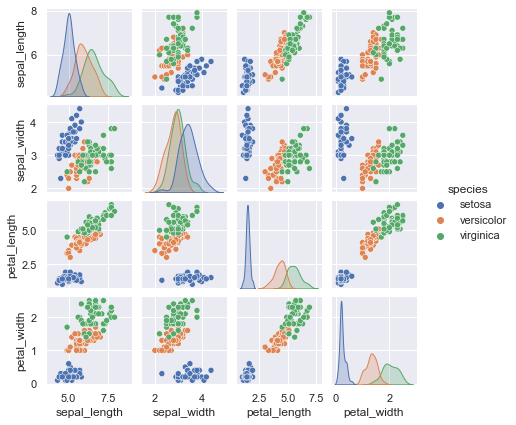

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

For use with Scikit-Learn, extract the features matrix and target array from `iris`:

In [3]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape, y_iris.shape

((150, 4), (150,))

### Scikit-Learn's Estimator API

Using the Scikit-Learn estimator API usually involves these steps:

1. Choose a class of model and import it from Scikit-Learn
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into features matrix and target vector.
4. Fit the model to the data by calling the `fit()` method of the model instance.
5. Apply the model to new data:
    * For supervised learning, we often predict labels for unknown data using `predict()`.
    * For unsupervised learning, we often transform or infer properties of the data using `transform()` or `predict()` methods.

As an example, consider a simple linear regression.

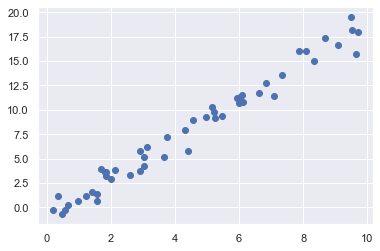

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [5]:
# 1. Choose a class of model
from sklearn.linear_model import LinearRegression

# 2. Hyperparameters: fit an intercept
model = LinearRegression(fit_intercept=True)

# 3. Arrange data. Note that the data needs to be pivoted from a vector to a matrix [n_samples, n_features]
X = x[:, np.newaxis]
X.shape

(50, 1)

In [6]:
# 4. Fit the model to the data
model.fit(X, y)

LinearRegression()

In [7]:
# All model parameters that were learned from `fit()` have trailing underscores
model.coef_, model.intercept_


(array([1.9776566]), -0.903310725531111)

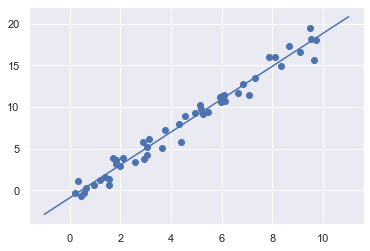

In [8]:
# 5. Predict labels for unknown data
# Make some 'new' data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

Next, we consider the Iris dataset from earlier. Our question is: given a model trained on a subset of the data, how well can we predict the remaining labels?
For this, we will use the simple generative model Gaussian naive Bayes, which assumes each class is drawn from an axis-aligned Gaussian distribution.
This is a good choice for a baseline model because it is fast and has no hyperparameters to choose.

Split the data into *training* and *testing* sets with the `train_test_split` utility function:

In [9]:
# Note that `sklearn.cross_validation` is no longer the submodule
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, )

Check out the size of the dataframes:

In [10]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

Fit the model to the train set and predict the labels on the test set:

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now use `accuracy_score` to see the fraction of correctly predicted labels:

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

1.0

Next, we will attempt to reduce the dimensionality of the Iris data to more easily visualize it in two dimensions (from four dimensions).
For this, we use principal components analysis and specify two components:

In [13]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris) # Note that y is not specified
X_2d = model.transform(X_iris) # Transform the data using the fit model


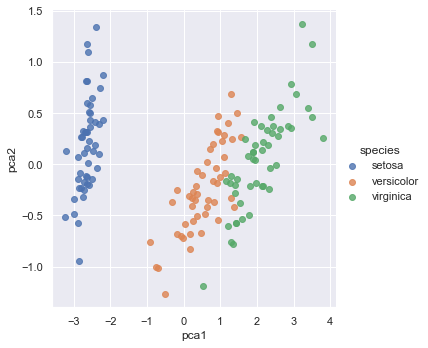

In [14]:
iris['pca1'] = X_2d[:, 0]
iris['pca2'] = X_2d[:, 1]
sns.lmplot(x='pca1', y='pca2', data=iris, hue='species', fit_reg=False);

And another unsupervised example: clustering with a Gaussian mixture model:

In [15]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)


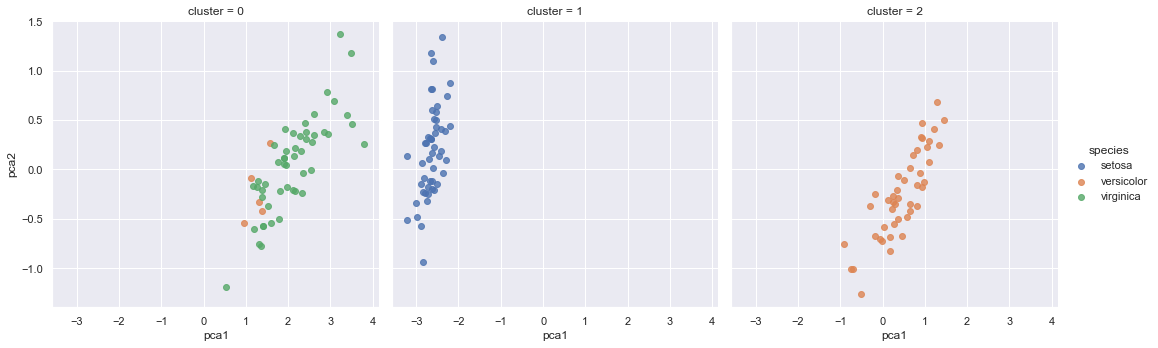

In [16]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x='pca1', y='pca2', hue='species', col='cluster', fit_reg=False);

### Application: Exploring Handwritten Digits

Import the `digits` data available from `sklearn.datasets`:

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

These are three-dimensional arrays which can be visualized:

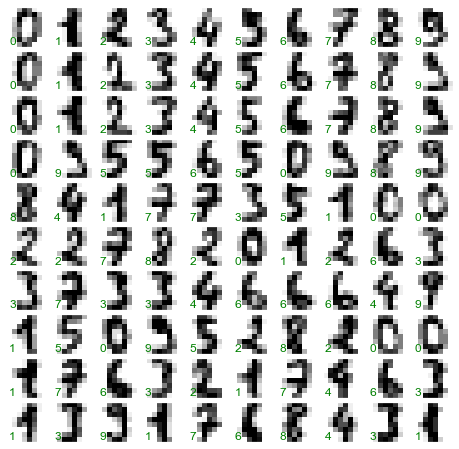

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color = 'green')

In order to work with this data in Scikit-Learn, it needs to be represented as two-dimensional `[n_samples, n_features]`.
To do this, we can treat each pixel in the image as a feature by flattening out the pixel arrays.
This, along with the digit labels, are contained in the `data` and `target` attributes:

In [19]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

There are 1797 total images, with 64 features corresponding to the 64 pixels (8x8 grid).

In order to visualize the 64 features, we'll reduce the parameter space to two dimensions using unsupervised manifold learning algorithm called *Isomap*:

In [20]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

Now that the data are two-dimensional, we can plot it and see if we can learn anything from its structure:

C:\Users\tdunn\AppData\Local\Temp\ipykernel_2356\3832024680.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='digit label', ticks=range(10))


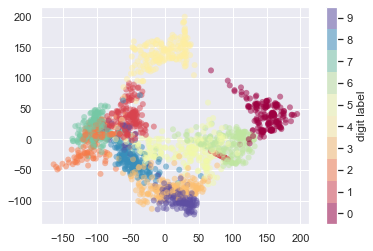

In [21]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Some of the digits, for example "1" and "0" are well-separated.
Others, like "1" and "4", have a lot of overlap.
Regardless, a straightforward supervised classification algorithm should perform suitably on this data.
Split into training and testing sets and fit a Gaussian naive Bayes model:

In [22]:
from sklearn.model_selection import train_test_split
# I'm not setting the `test_size` or `train_size`, but leaving default 20-80
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Visualize this performance with a confusion matrix:

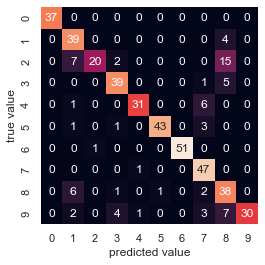

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This is a nice way to see where the misclassifications occur.
For example, many "2"s are predicted to be "8" or "1".

Plot the inputs again, with their predicted labels (green for correct, red for incorrect):

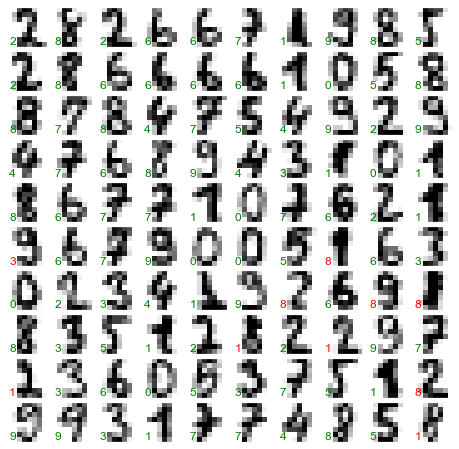

In [24]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
                    
test_images = Xtest.reshape(-1, 8, 8)
                    
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### Summary

>In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API. Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds. Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

>In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.

## Hyperparameters and Model Validation

### Thinking About Model Validation

### Selecting the Best Model

### Learning Curves

### Validation in Practice: Grid Search

### Summary

## Feature Engineering

### Categorical Features

### Text Features

### Image Features

### Derived Features

### Imputation of Missing Data

### Feature Pipelines

## In Depth: Naive Bayes Classification

### Bayesian Classificiation

### Gaussian Naive Bayes

### Multinomial Naive Bayes

### When to Use Naive Bayes

## In Depth: Linear Regression

### Simple Linear Regression

### Basis Function Regression

### Regularization

### Example: Predicting Bicycle Traffic